"A tool for converting Sympy expressions to a Pytensor graph, with support for working with PyMC models." -- [sympytensor](https://github.com/jessegrabowski/sympytensor)

In [1]:
from sympytensor import SympyDeterministic
import pymc as pm
import sympy as sp
from sympy.abc import a, b, c, d
import arviz as az

In [5]:
sp.init_printing(use_latex=True)

In [2]:
A = sp.Matrix([[a, b],
               [c, d]])
A_inv = sp.matrices.Inverse(A).doit()

with pm.Model() as m:
    a_pm = pm.Normal('a')
    b_pm = pm.Normal('b')
    c_pm = pm.Normal('c')
    c_pm = pm.Normal('d')
    A_inv_pm = SympyDeterministic('A_inv', A_inv)

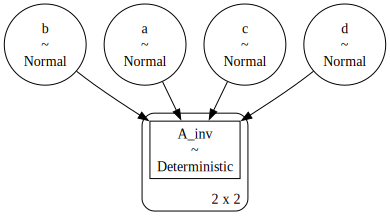

In [7]:
pm.model_to_graphviz(m)

In [6]:
A_inv

⎡    d         -b    ⎤
⎢─────────  ─────────⎥
⎢a⋅d - b⋅c  a⋅d - b⋅c⎥
⎢                    ⎥
⎢   -c          a    ⎥
⎢─────────  ─────────⎥
⎣a⋅d - b⋅c  a⋅d - b⋅c⎦

In [36]:
# Very simple linear model (from package tests)
variables = x_s, x_d, P, P_e, M_d, M_s = sp.symbols("x_s x_d P P_e M_d M_s")
params = a, b, c, d, P_e_bar, tau = sp.symbols(r"a b c d P_e_bar tau")

equations = [
    P - a * x_s - b,
    P + c * x_d - d,
    M_d - x_d + x_s,
    P_e - P_e_bar,
    M_d - M_s,
    P - (1 + tau) * P_e,
]

# Solve by putting it into reduced row-echelon form
system, bias = sp.linear_eq_to_matrix(equations, variables)
Ab = sp.Matrix([[system, bias]])
A_rref, pivots = Ab.rref()

# Solutions are in the last column. Sympy can't squeeze, so extract the elements into a list
model = [elem for elem in A_rref[:, -1]]
coords = {"variable": ["x_s", "x_d", "P", "P_e", "M_d", "M_s"]}

with pm.Model(coords=coords) as lm:
    a = pm.Normal("a")
    b = pm.Normal("b")
    c = pm.Normal("c")
    d = pm.Normal("d")
    P_e_bar_pm = pm.Normal("P_e_bar")
    tau_pm = pm.Normal(r"tau")

    y = SympyDeterministic("y", model, dims=["variable"])

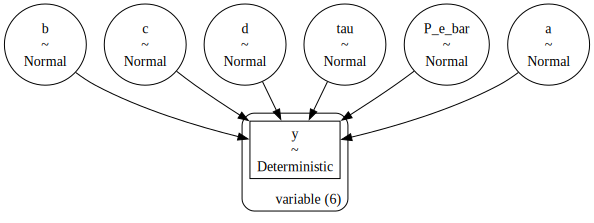

In [37]:
pm.model_to_graphviz(lm)

In [39]:
tau, P_e_bar

In [40]:
model